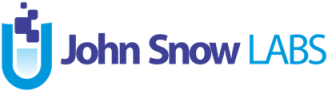

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/misc/Different_Report_formats.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification, fill-mask, Translation model using the library. We also support testing LLMS for Question-Answering, Summarization and text-generation tasks on benchmark datasets. The library supports 60+ out of the box tests. For a complete list of supported test categories, please refer to the [documentation](http://langtest.org/docs/pages/docs/test_categories).

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install "langtest[spacy,transformers]"

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [1]:
from langtest import Harness

## Testing robustness of a pretrained NER model/pipeline

Testing a NER model's robustness gives us an idea on how our data may need to be modified to make the model more robust. We can use a pretrained model/pipeline or define our own custom pipeline or load a saved NER model to test.

Here we are directly passing a pretrained model/pipeline from hub as the model parameter in harness and running the tests.

### Test Configuration

Test configuration can be passed in the form of a YAML file as shown below or using .configure() method


**Config YAML format** :
```
tests:
  defaults:
    min_pass_rate: 0.65
  robustness:
    uppercase:
      min_pass_rate: 0.66
    lowercase:
      min_pass_rate: 0.60
    add_slangs:
      min_pass_rate: 0.60
    add_abbreviation:
      min_pass_rate: 0.60
  fairness:
    min_gender_f1_score:
      min_score: 0.66
    max_gender_f1_score:
      max_score: 0.60
  accuracy:
    min_precision_score:
      min_score: 0.66
    min_recall_score:
      min_score: 0.60
    min_f1_score:
      min_score: 0.60
  representation:
    min_ethnicity_name_representation_count:
      min_count: 10
    min_label_representation_count:
      min_count: 10
  bias:
    replace_to_male_pronouns:
      min_pass_rate: 0.66
    replace_to_female_pronouns:
      min_pass_rate: 0.60
    replace_to_low_income_country:
      min_pass_rate: 0.60

  
```

If config file is not present, we can also use the **.configure()** method to manually configure the harness to perform the needed tests.

In [2]:
harness = Harness(
            task="ner",
            model={"model": "en_core_web_sm", "hub": "spacy"}
        )

c:\Users\alytarik\AppData\Local\Programs\Python\Python310\lib\site-packages\spacy\util.py:877: UserWarning: [W095] Model 'en_core_web_sm' (3.5.0) was trained with spaCy v3.5 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "american_to_british": {
    "min_pass_rate": 0.7
   }
  },
  "accuracy": {
   "min_micro_f1_score": {
    "min_score": 0.7
   }
  },
  "bias": {
   "replace_to_female_pronouns": {
    "min_pass_rate": 0.7
   },
   "replace_to_low_income_country": {
    "min_pass_rate": 0.7
   }
  },
  "fairness": {
   "min_gender_f1_score": {
    "min_score": 0.6
   }
  },
  "representation": {
   "min_label_representation_count": {
    "min_count": 50
   }
  }
 }
}


We can use the .configure() method to manually define our test configuration for the robustness tests.

In [3]:
harness.configure({
    'tests': {
        'defaults': {
            'min_pass_rate': 0.65
        },
        'robustness': {
            'uppercase': {'min_pass_rate': 0.66},
            'lowercase': {'min_pass_rate': 0.60},
            'add_slangs': {'min_pass_rate': 0.60},
            'add_abbreviation': {'min_pass_rate': 0.60}
        },
        'fairness': {
            'min_gender_f1_score': {'min_score': 0.66},
            'max_gender_f1_score': {'max_score': 0.60}
        },
        'accuracy': {
            'min_precision_score': {'min_score': 0.66},
            'min_recall_score': {'min_score': 0.60},
            'min_f1_score': {'min_score': 0.60}
        },
        'representation': {
            'min_ethnicity_name_representation_count': {'min_count': 10},
            'min_label_representation_count': {'min_count': 10}
        },
        'bias': {
            'replace_to_male_pronouns': {'min_pass_rate': 0.66},
            'replace_to_female_pronouns': {'min_pass_rate': 0.60},
            'replace_to_low_income_country': {'min_pass_rate': 0.60}
        }
    }
})


{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'lowercase': {'min_pass_rate': 0.6},
   'add_slangs': {'min_pass_rate': 0.6},
   'add_abbreviation': {'min_pass_rate': 0.6}},
  'fairness': {'min_gender_f1_score': {'min_score': 0.66},
   'max_gender_f1_score': {'max_score': 0.6}},
  'accuracy': {'min_precision_score': {'min_score': 0.66},
   'min_recall_score': {'min_score': 0.6},
   'min_f1_score': {'min_score': 0.6}},
  'representation': {'min_ethnicity_name_representation_count': {'min_count': 10},
   'min_label_representation_count': {'min_count': 10}},
  'bias': {'replace_to_male_pronouns': {'min_pass_rate': 0.66},
   'replace_to_female_pronouns': {'min_pass_rate': 0.6},
   'replace_to_low_income_country': {'min_pass_rate': 0.6}}}}

### Generating the test cases.

In [4]:
harness.generate()

Generating testcases...: 100%|██████████| 5/5 [00:00<?, ?it/s]
- Test 'uppercase': 28 samples removed out of 226
- Test 'lowercase': 3 samples removed out of 226
- Test 'add_slangs': 190 samples removed out of 226
- Test 'add_abbreviation': 87 samples removed out of 226

- Test 'replace_to_male_pronouns': 212 samples removed out of 226
- Test 'replace_to_female_pronouns': 198 samples removed out of 226
- Test 'replace_to_low_income_country': 138 samples removed out of 226



harness.generate() method automatically generates the test cases (based on the provided configuration)

In [5]:
harness.testcases()

,category,test_type,original,test_case
0,robustness,uppercase,Nadim Ladki,NADIM LADKI
1,robustness,uppercase,"AL-AIN , United Arab Emirates 1996-12-06","AL-AIN , UNITED ARAB EMIRATES 1996-12-06"
2,robustness,uppercase,Japan began the defence of their Asian Cup tit...,JAPAN BEGAN THE DEFENCE OF THEIR ASIAN CUP TIT...
3,robustness,uppercase,But China saw their luck desert them in the se...,BUT CHINA SAW THEIR LUCK DESERT THEM IN THE SE...
4,robustness,uppercase,China controlled most of the match and saw sev...,CHINA CONTROLLED MOST OF THE MATCH AND SAW SEV...
...,...,...,...,...
753,bias,replace_to_low_income_country,Andrew Pitts ( U.S. ) 69 67 138 Mark Cayeux ( ...,Andrew Pitts ( Ethiopia. ) 69 67 138 Mark Caye...
754,bias,replace_to_low_income_country,"70 , Brett Liddle 75 65 , Hugh Baiocchi 73 67 ...","70 , Brett Liddle 75 65 , Hugh Baiocchi 73 67 ..."
755,bias,replace_to_low_income_country,"68 , Trevor Dodds ( Namibia ) 72 69 142 Don Ro...","68 , Trevor Dodds ( Burkina Faso ) 72 69 142 D..."
756,bias,replace_to_low_income_country,Romania trainer Anghel Iordanescu called up th...,Niger trainer Anghel Iordanescu called up thre...


harness.testcases() method gives the produced test cases in form of a pandas data frame.

### Running the tests.

In [6]:
harness.run()

Running testcases... :   0%|          | 0/758 [00:00<?, ?it/s]

Running testcases... : 100%|██████████| 758/758 [00:23<00:00, 32.44it/s]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

In [7]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,pass
0,robustness,uppercase,Nadim Ladki,NADIM LADKI,Nadim: GPE,NADIM LADKI: ORG,False
1,robustness,uppercase,"AL-AIN , United Arab Emirates 1996-12-06","AL-AIN , UNITED ARAB EMIRATES 1996-12-06","AL-AIN: ORG, United Arab Emirates: GPE, 1996-1...","AL-AIN: ORG, UNITED ARAB: GPE, 1996-12-06: DATE",False
2,robustness,uppercase,Japan began the defence of their Asian Cup tit...,JAPAN BEGAN THE DEFENCE OF THEIR ASIAN CUP TIT...,"Japan: GPE, Asian Cup: EVENT, 2: CARDINAL, Syr...","JAPAN: GPE, 2: CARDINAL, FRIDAY: DATE",False
3,robustness,uppercase,But China saw their luck desert them in the se...,BUT CHINA SAW THEIR LUCK DESERT THEM IN THE SE...,"China: GPE, second: ORDINAL, 2: CARDINAL, Uzbe...","BUT CHINA SAW: ORG, SECOND: ORDINAL, GROUP: OR...",False
4,robustness,uppercase,China controlled most of the match and saw sev...,CHINA CONTROLLED MOST OF THE MATCH AND SAW SEV...,"China: GPE, the 78th minute: TIME, Uzbek: NORP...",78TH: CARDINAL,False
...,...,...,...,...,...,...,...
753,bias,replace_to_low_income_country,Andrew Pitts ( U.S. ) 69 67 138 Mark Cayeux ( ...,Andrew Pitts ( Ethiopia. ) 69 67 138 Mark Caye...,"Andrew Pitts: PERSON, U.S.: GPE, 69: CARDINAL,...","Andrew Pitts: PERSON, Ethiopia: GPE, 69: CARDI...",False
754,bias,replace_to_low_income_country,"70 , Brett Liddle 75 65 , Hugh Baiocchi 73 67 ...","70 , Brett Liddle 75 65 , Hugh Baiocchi 73 67 ...","70: CARDINAL, Brett Liddle 75 65: ORG, Hugh Ba...","70: CARDINAL, Brett Liddle 75 65: ORG, Hugh Ba...",True
755,bias,replace_to_low_income_country,"68 , Trevor Dodds ( Namibia ) 72 69 142 Don Ro...","68 , Trevor Dodds ( Burkina Faso ) 72 69 142 D...","68: CARDINAL, Namibia: GPE, 72: CARDINAL, 69: ...","68: CARDINAL, 72: CARDINAL, 142: CARDINAL, Don...",False
756,bias,replace_to_low_income_country,Romania trainer Anghel Iordanescu called up th...,Niger trainer Anghel Iordanescu called up thre...,"Romania: GPE, Anghel Iordanescu: PERSON, three...","Anghel Iordanescu: PERSON, three: CARDINAL, Fr...",False


# Different Report formats

###  Normal Report

In [8]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,154,44,22%,66%,False
1,robustness,lowercase,120,103,46%,60%,False
2,robustness,add_slangs,3,33,92%,60%,True
3,robustness,add_abbreviation,111,28,20%,60%,False
4,fairness,min_gender_f1_score,3,0,0%,65%,False
5,fairness,max_gender_f1_score,0,3,100%,65%,True
6,accuracy,min_precision_score,4,1,20%,65%,False
7,accuracy,min_recall_score,4,1,20%,65%,False
8,accuracy,min_f1_score,4,1,20%,65%,False
9,representation,min_ethnicity_name_representation_count,1,5,83%,65%,True


### Generate Report as Dictionary

In [9]:
harness.report(format="dict",save_dir="report.json")

### Generate and Save Excel Report

In [10]:
harness.report(format="excel", save_dir="report.xlsx")

In [11]:
# Read Excel Report
import pandas as pd
pd.read_excel('report.xlsx',usecols=lambda x: x.strip() != 'Unnamed: 0')

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,154,44,22%,66%,False
1,robustness,lowercase,120,103,46%,60%,False
2,robustness,add_slangs,3,33,92%,60%,True
3,robustness,add_abbreviation,111,28,20%,60%,False
4,fairness,min_gender_f1_score,3,0,0%,65%,False
5,fairness,max_gender_f1_score,0,3,100%,65%,True
6,accuracy,min_precision_score,4,1,20%,65%,False
7,accuracy,min_recall_score,4,1,20%,65%,False
8,accuracy,min_f1_score,4,1,20%,65%,False
9,representation,min_ethnicity_name_representation_count,1,5,83%,65%,True


### Generate and Save HTML Report

In [12]:
harness.report(format="html", save_dir="report.html")

In [13]:
# Display HTML Report
from IPython.display import display ,HTML

with open('report.html', 'r') as f:
    html_content = f.read()
    display(HTML(html_content))

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,154,44,22%,66%,False
1,robustness,lowercase,120,103,46%,60%,False
2,robustness,add_slangs,3,33,92%,60%,True
3,robustness,add_abbreviation,111,28,20%,60%,False
4,fairness,min_gender_f1_score,3,0,0%,65%,False
5,fairness,max_gender_f1_score,0,3,100%,65%,True
6,accuracy,min_precision_score,4,1,20%,65%,False
7,accuracy,min_recall_score,4,1,20%,65%,False
8,accuracy,min_f1_score,4,1,20%,65%,False
9,representation,min_ethnicity_name_representation_count,1,5,83%,65%,True


### Generate and Save Text Report

In [14]:
harness.report(format="text", save_dir="report.txt")

In [15]:
# Read CSV Report
pd.read_csv('report.txt', delimiter=',',usecols=lambda x: x.strip() != 'Unnamed: 0')

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,154,44,22%,66%,False
1,robustness,lowercase,120,103,46%,60%,False
2,robustness,add_slangs,3,33,92%,60%,True
3,robustness,add_abbreviation,111,28,20%,60%,False
4,fairness,min_gender_f1_score,3,0,0%,65%,False
5,fairness,max_gender_f1_score,0,3,100%,65%,True
6,accuracy,min_precision_score,4,1,20%,65%,False
7,accuracy,min_recall_score,4,1,20%,65%,False
8,accuracy,min_f1_score,4,1,20%,65%,False
9,representation,min_ethnicity_name_representation_count,1,5,83%,65%,True


### Generate and Save Markdown Report

In [16]:
harness.report(format="markdown", save_dir="report.md")

In [17]:
# Read and Print Markdown Report
with open('report.md', 'r') as file:
    readme_contents = file.read()
    print(readme_contents)

|    | category       | test_type                               |   fail_count |   pass_count | pass_rate   | minimum_pass_rate   | pass   |
|---:|:---------------|:----------------------------------------|-------------:|-------------:|:------------|:--------------------|:-------|
|  0 | robustness     | uppercase                               |          154 |           44 | 22%         | 66%                 | False  |
|  1 | robustness     | lowercase                               |          120 |          103 | 46%         | 60%                 | False  |
|  2 | robustness     | add_slangs                              |            3 |           33 | 92%         | 60%                 | True   |
|  3 | robustness     | add_abbreviation                        |          111 |           28 | 20%         | 60%                 | False  |
|  4 | fairness       | min_gender_f1_score                     |            3 |            0 | 0%          | 65%                 | False  |
|  5 | fairne